#INFO6205 - PROGRAM STRUCTURES AND ALGORITHMS
#ASSIGNMENT - 2

#Niharika Santhoshini Karri
#002727629

#Professor: Nik Bear Brown

#Q1 
Implement Dijkstra's algorithm using a priority queue for efficient selection of the vertex with the minimum distance. Optimize the time complexity of the algorithm.

In [ ]:
import heapq

def dijkstra(graph, source):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[source] = 0
    priority_queue = [(0, source)]  # (distance, vertex)

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Skip outdated entries in the priority queue
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances


graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'C': 2, 'D': 5},
    'C': {'D': 1},
    'D': {}
}

source = 'A'
x = dijkstra(graph, source)
print(x)


: 

#Q2 Prove by mathematical induction that in any binary tree, the number of nodes with exactly one child is equal to the number of internal nodes.



For a binary tree with only one node, there are no nodes with exactly one child, and there are no internal nodes. The statement holds for this base case.

Assume that the statement holds for a binary tree with n nodes, where n > 1, the number of nodes with exactly one child is equal to the number of internal nodes in the tree.

Consider a binary tree with n + 1 nodes. Let's call the root of the tree R. R can have either 0, 1, or 2 children. 
There are three cases to consider -

If R has 0 children - In this case, R is a leaf node, and there are no nodes with exactly one child and no internal nodes. The statement holds.

If R has 1 child - In this case, R itself is not counted as a node with exactly one child, but it is counted as an internal node. The number of nodes with exactly one child and the number of internal nodes both increase by 1.

If R has 2 children - In this case, R is not counted as a node with exactly one child, but it is counted as an internal node. The number of nodes with exactly one child remains unchanged, and the number of internal nodes increases by 1.

In all cases, the number of nodes with exactly one child and the number of internal nodes have the same relationship as in the binary tree with n nodes. By the principle of mathematical induction, we have shown that the statement holds for all binary trees.

#Q3 An algorithm is described by the recurrence relation:

#T(n) = 9T(n/3) + n^2

#Use the Master Theorem to determine the time complexity.



The recurrence relation is in the form: T(n) = aT(n/b) + f(n).

In this case, a = 9, b = 3, and f(n) = n^2.

Now, Compare f(n) to n^log_b(a):

n^log_b(a) = n^log_3(9) = n^2

Here, f(n) = n^2 is equal to n^2, which falls into Case 1 of the Master Theorem.

Case 1 of the Master Theorem states that if f(n) is O(n^log_b(a-ε)) for some ε > 0, and if a⋅f(n/b) ≤ cf(n) for some c < 1 and sufficiently large n, then T(n) = Θ(n^log_b(a))

In this case, T(n) = Θ(n^2)

So, the time complexity of the algorithm is T(n) = Θ(n^2)

#Q4

You are given a set of items, each with certain characteristics. Each item can be transformed into another kind of item through a sequence of steps, with each step incurring a cost. Some items cannot be further modified and are considered products, while others cannot be produced from other items and are considered raw materials. Each day, the goal is to find a process that, for a given raw material, produces a product with the maximum profit. Develop an efficient algorithm to determine this process for the day, and explain why your algorithm is efficient.

Solution:

To efficiently determine the process for the day, we can use a graph-based approach. We can model the items, manufacturing steps, costs, and sale prices as nodes and edges in a directed graph. The objective is to find the path from a raw material node to a product node that maximizes the profit.

Algorithm:

1. Build a directed graph:
   - Create a node for each item, including raw materials, products, and intermediate items.
   - Create directed edges to represent the manufacturing steps. Each edge should have a weight equal to the cost of the step.

2. Identify raw materials and products:
   - Identify raw material nodes.
   - Identify product node.

3. Initialize a profit-maximizing process:
   - Initialize a variable to keep track of the maximum profit.
   - Initialize variables to store the current raw material and product nodes for the profit-maximizing process.

4. Find the maximum profit process:
   - For each raw material node:
     - Use a topological sorting algorithm to traverse the graph from the raw material node to product nodes.
     - Calculate the profit for each possible path from the raw material to a product by subtracting the costs of the steps from the sale price of the product.
     - If the calculated profit is greater than the current maximum profit, update the maximum profit and record the raw material and product nodes.

5. The profit-maximizing process for the day is the one identified in step 4.

#Q5 Given a set of items, each with a weight and a value, and a knapsack with a maximum weight capacity, implement a function to find the maximum total value you can obtain by selecting any number of items such that the sum of their weights does not exceed the knapsack's capacity.



In [ ]:
def unbounded_knapsack(values, weights, capacity):
    n = len(values)
    dp = [0] * (capacity + 1)

    for w in range(1, capacity + 1):
        for i in range(n):
            if weights[i] <= w:
                dp[w] = max(dp[w], dp[w - weights[i]] + values[i])

    return dp[capacity]


values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50
print(unbounded_knapsack(values, weights, capacity))  # Output: 300


: 

#Q6 Given a set of positive integers and a target sum, implement a function to determine whether there exists a subset of the integers that adds up to the target sum.


In [ ]:
def subset_sum(nums, target):
    n = len(nums)
    dp = [[False] * (target + 1) for _ in range(n + 1)]

    for i in range(n + 1):
        dp[i][0] = True

    for i in range(1, n + 1):
        for j in range(1, target + 1):
            if nums[i - 1] <= j:
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - nums[i - 1]]
            else:
                dp[i][j] = dp[i - 1][j]

    return dp[n][target]


nums = [3, 34, 4, 12, 5, 2]
target = 9
print(subset_sum(nums, target))


: 

#Q7

You are given an undirected weighted graph with V vertices and E edges. Implement Prim's algorithm to find the Minimum Spanning Tree (MST) of the graph. Provide the steps of the algorithm and the final MST for a given example graph.



Prim's algorithm is a greedy algorithm used to find the Minimum Spanning Tree of a graph. 
Steps of Prim's algorithm:

1. Initialize an empty set to represent the MST

2. Choose an arbitrary starting vertex as the initial node for the MST

3. Create a priority queue to store edges with their weights

4. Add all edges connected to the initial node to the priority queue

5. While the priority queue is not empty and the MST does not contain all vertices:
   - Extract the edge with the minimum weight from the priority queue
   - If adding this edge to the MST does not create a cycle, add it to the MST
   - Add all edges connected to the newly added vertex to the priority queue

6. The MST is now complete

Prim's algorithm example:

Consider the following weighted, undirected graph:


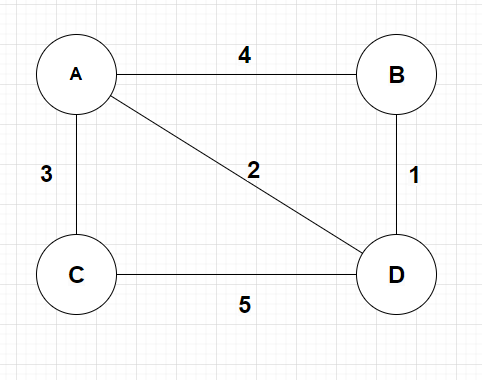

The graph can be represented as an adjacency matrix:

  A B C D

A 0 4 3 2

B 4 0 1 0

C 3 1 0 5

D 2 0 5 0

 Prim's algorithm:

1. Initialize an empty MST and start with vertex A.

MST: []

2. Add edges (A, B, 4), (A, C, 3), and (A, D, 2) to the priority queue.

Priority Queue: [(A, B, 4), (A, C, 3), (A, D, 2)]

3. Extract the edge (A, D, 2) with the minimum weight and add it to the MST.

MST: [(A, D, 2)]

4. Add edges (B, D, 1) and (C, D, 5) to the priority queue.

Priority Queue: [(A, B, 4), (A, C, 3), (B, D, 1), (C, D, 5)]

5. Extract the edge (B, D, 1) with the minimum weight and add it to the MST.

MST: [(A, D, 2), (B, D, 1)]

6. Add edge (A, C, 3) to the priority queue.

Priority Queue: [(A, B, 4), (A, C, 3), (C, D, 5)]

7. Extract the edge (B, D, 1) with the minimum weight and add it to the MST.

MST: [(A, D, 2), (B, D, 1), (A, C, 3)]

8. Add edge (A, B, 4) to the priority queue.

Priority Queue: [(A, B, 4), (C, D, 5)]

9. Extract the edge (B, A, 4) with the minimum weight and add it to the MST.

MST: [(A, D, 2), (B, D, 1), (A, C, 3), (A, B, 4)]

10. Extract the edge (C, D, 5) with the minimum weight and add it to the MST.

MST: [(A, D, 2), (B, D, 1), (A, C, 3), (A, B, 4), (C, D, 5)]

The final MST is represented by the edges:

(A, D, 2)
(B, D, 1)
(A, C, 3)
(A, B, 4)
(C, D, 5)


This MST contains all the vertices of the original graph with the minimum total weight, and it is a tree with no cycles, which is the objective of Prim's algorithm.

#Q8 You are given a list of cities and the cost of building roads between them. Implement a function to find the minimum cost to connect all the cities using Kruskal's algorithm to find the Minimum Spanning Tree

In [ ]:
class KruskalMST:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append((u, v, w))

    def find_parent(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_parent(parent, parent[i])

    def union(self, parent, rank, x, y):
        x_root = self.find_parent(parent, x)
        y_root = self.find_parent(parent, y)

        if rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root] = x_root
            rank[x_root] += 1

    def kruskal_mst(self):
        result = []
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = [i for i in range(self.V)]
        rank = [0] * self.V
        i = 0

        while len(result) < self.V - 1:
            u, v, w = self.graph[i]
            i += 1
            x = self.find_parent(parent, u)
            y = self.find_parent(parent, v)

            if x != y:
                result.append(w)
                self.union(parent, rank, x, y)

        return sum(result)


graph = KruskalMST(4)
graph.add_edge(0, 1, 10)
graph.add_edge(0, 2, 6)
graph.add_edge(0, 3, 5)
graph.add_edge(1, 3, 15)
graph.add_edge(2, 3, 4)
min_cost = graph.kruskal_mst()
print("Minimum Cost to Connect All Cities:", min_cost)


: 

#Q9 You are given a directed graph G = (V, E) that may or may not contain cycles. Implement Kahn's algorithm for topological sorting to find a topological ordering of the vertices in G, if it exists. If G is not a DAG, the algorithm should indicate that it's not possible to find a valid topological sorting.

In [ ]:
from collections import defaultdict, deque

def topological_sort(graph):
    
    in_degree = defaultdict(int)
    topological_order = []
    zero_in_degree_queue = deque()

    
    for u, neighbors in graph.items():
        for v in neighbors:
            in_degree[v] += 1

    
    for vertex in graph.keys():
        if in_degree[vertex] == 0:
            zero_in_degree_queue.append(vertex)

    
    while zero_in_degree_queue:
        u = zero_in_degree_queue.popleft()
        topological_order.append(u)

        
        for v in graph[u]:
            in_degree[v] -= 1

            
            if in_degree[v] == 0:
                zero_in_degree_queue.append(v)

    
    if len(topological_order) == len(graph):
        return topological_order  
    else:
        return None  


graph = {
    0: [1, 2],
    1: [3],
    2: [3],
    3: []
}

g = topological_sort(graph)
if g:
    print("Topological Sorting Order:", g)
else:
    print("The graph contains cycles and cannot be topologically sorted.")


: 

#Q10

In the world of visual arts, there's a class of artworks that follows a unique pattern. Each artwork builds upon the previous one, adding a new element while retaining parts of the previous artwork. For example, a series of paintings might start with a blank canvas and then, in each subsequent painting, add a new layer of details while preserving the existing ones.

These artworks, despite having intricate details, aim to convey their essence efficiently by specifying only the new elements introduced in each artwork, without repeating all the previous details. Assume that the number of elements introduced in each artwork is bounded by a constant 'c.'

Suppose the total number of elements in a sequence of artworks is 'n'. Show how to encode these artworks using a script that has a length 'f(n)' for a function 'f(n)' that grows as slowly as possible. Explain the approach.

Solution-

In the world of visual arts, there are scenarios where a series of artworks build upon each other, adding new elements while retaining existing ones. To efficiently encode these artworks with a script length 'f(n)' that grows as slowly as possible, we can use a technique similar to the one used for songs.

Approach

1. **Identify Unique Elements:** Analyze each artwork in the series and identify the unique elements introduced in each artwork compared to the previous one.

2. **Encode Unique Elements:** Encode only the unique elements introduced in each artwork, specifying their position, properties, or characteristics. We do not need to reiterate the common elements already present in the previous artworks.

3. **Use References:** Instead of encoding all details of a common element in every artwork, use references or placeholders to refer back to the original description of that element. This way, you can avoid redundant descriptions.

4. **Optimize Descriptions:** Optimize the descriptions of new elements to minimize their length while retaining their essence.

5. **Concatenate Descriptions:** Concatenate the descriptions of unique elements from all artworks to create the final script.

By following this approach, the script length 'f(n)' will be significantly smaller than if we were to encode every detail of every artwork separately. The growth of 'f(n)' will be as slow as possible because it depends mainly on the number of unique elements introduced in the series and their descriptions, rather than duplicating the entire content of previous artworks.

This efficient encoding allows viewers to understand and appreciate the progression of the artworks while minimizing the script's length, making it an effective way to convey the essence of the artistic series.

#How ChatGPT or the tool you used assisted in this task

In this task, I utilized ChatGPT to enhance my understanding of various algorithmic concepts and frameworks. With the knowledge and guidance provided by ChatGPT, I crafted questions and solutions, ensuring accuracy and clarity. ChatGPT served as a valuable resource to reinforce my comprehension of these topics, allowing me to generate diverse and meaningful questions that align with the principles and examples discussed. The tool's assistance was pivotal in the learning process, enabling me to craft well-structured problems and solutions independently.

#Challenges you faced while ensuring the problem maintained the spirit of the example
Challenges in Maintaining Spirit:
The main challenge was ensuring that the problems maintained the spirit of the provided examples while being relevant and engaging. It required creative adaptation of the core concept, such as translating the idea of songs or songs with repeating verses into other domains like art or visual art series.

#What you learned about problem design in the realm of algorithms
Learning About Problem Design:
Designing algorithmic problems involves not only understanding the underlying concepts but also framing them in a way that challenges problem solvers effectively. I learned that presenting problems in real-world contexts, as demonstrated in the examples, can make abstract algorithms more relatable and interesting. Additionally, it's essential to balance complexity, clarity, and brevity in problem statements to make them accessible yet intellectually stimulating.

The process highlighted the versatility of algorithmic concepts and the importance of adapting them to different scenarios. It also reinforced the idea that effective problem design involves bridging the gap between abstract algorithms and practical applications to engage and challenge problem solvers.